# A3_Reproducibility  [Sample Solution]

## 3.1 Reproducible Model Training

In [89]:
##################################
# import necessary libraries     #
##################################

# general                        
import pandas as pd                                                                      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# modeling
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# classification evaluations
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import auc, roc_curve, roc_auc_score

### 3.1.1. Data Preparation

In [90]:
##################################
# import preprocessed data from  #
# assignment 2                   #
##################################

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data_frame = pd.read_csv("sgc_data_readable.csv")

# drop unnamed:0 coloumn
data_frame = data_frame.drop(["Unnamed: 0"], axis = 1)

# drop first line
data_frame.drop(index=data_frame.index[0], 
        axis=0, 
        inplace=True)

####################################################################
# if you want to print the table, uncomment the following line:    #
####################################################################
# data_frame.head()

In [91]:
###################################
# Split features into categorical # 
# and numerical, print numerical  #
###################################

dtype = data_frame.dtypes
numerical_features = dtype[dtype == 'int64'].index
categorical_features = dtype[dtype == 'object'].index

data_frame[numerical_features].describe()

,duration in month,credit amount,relationship : age
count,999.000000,999.000000,999.000000
mean,20.905906,3273.472472,35.556557
std,12.064504,2823.288536,11.349016
min,4.000000,250.000000,19.000000
25%,12.000000,1368.500000,27.000000
50%,18.000000,2320.000000,33.000000
75%,24.000000,3972.500000,42.000000
max,72.000000,18424.000000,75.000000


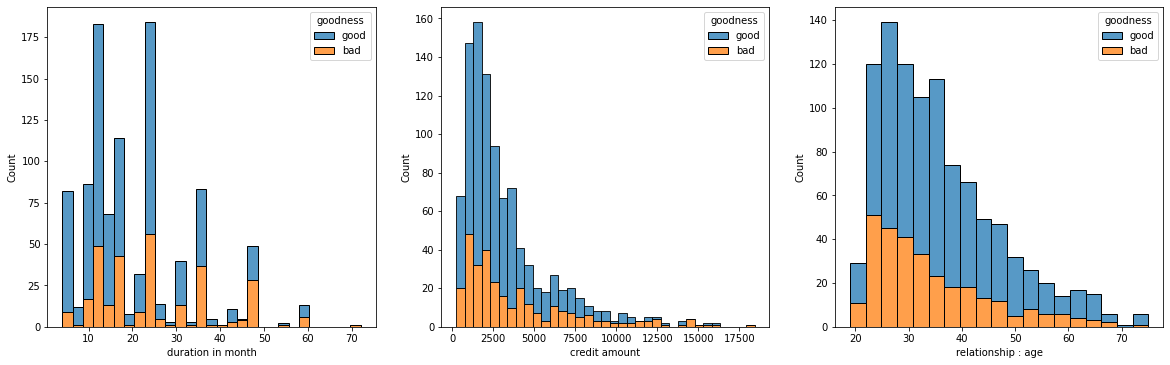

In [92]:
##################################
# Plot function for histogram    #
##################################

def explorative_analysis (input_data, features, plot_type, plot, grid):
    ax ={}
    for i in range(len(features)):
        ax[i] = plot.add_subplot(grid[i])
        if plot_type == 'hist':
            sns.histplot(x=features[i], data=input_data, hue = input_data["goodness"], stat="count", multiple="stack")
  

##################################
# Plot numerical features as     #
# histograms                     #
##################################

fig = plt.figure(figsize=(20,20))
grid = gridspec.GridSpec(3,3)
explorative_analysis(data_frame, numerical_features, 'hist', fig, grid)

In [93]:
##################################
# import original data           #
# for data analysis              #
##################################

sgc_data = pd.read_csv("south_german_credit_data_preprocessed.csv")
pd.set_option('display.max_columns', None )
sgc_data

# Dropping first row from the data frame 
sgc_data.drop(index=sgc_data.index[0], inplace=True)

# Convert string to int for all the columns in the dataframe
sgc_data = sgc_data.astype(int)

####################################################################
# if you want to print the datatypes, uncomment following line:    #
####################################################################
#sgc_data.dtypes

In [94]:
##################################
# split dataset into feature     #
# dataset and class label        #
##################################

X = sgc_data.drop(['goodness'], axis=1)
y = X = sgc_data.drop(['goodness'], axis=1)

In [95]:
##################################
# prepare data for modeling      #
##################################

####################################################################
# uncomment following line, if you want to exclude sex as factor,  #
# assuming it'll bias the results.                                 #
# Excursus: you can also play around with other factors and see    #
# how they affect the results.                                     #
####################################################################
#sgc_data = sgc_data.drop(columns=['status : sex'])

# shuffle data, because all 'good' scores are in the top of the table
sgc_data = sgc_data.sample(frac=1).reset_index(drop=True)
n = len(sgc_data)

# Split the data in test data and training data
X = sgc_data.drop(columns = 'goodness', axis = 1) 
y = sgc_data['goodness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

### 3.1.2 Training: Logistic Regression

In [96]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)

In [97]:
###################################################################
# Model Accuracy: how often is the classifier correct?            #                                     #
###################################################################
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

###################################################################
# Model Precision: True Positive/(True Positive + False Positive) #
###################################################################
print("Precision:",metrics.precision_score(y_test, predictions))

###################################################################
# Model Recall: True Positive/(True Positive + False Negative)    #
###################################################################
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.75
Precision: 0.7656903765690377
Recall: 0.905940594059406


### 3.1.3 Modeling: Support Vector Machine 

In [98]:
# create a Support Vector Machine Classifier with a Linear Kernel
SVM = svm.SVC(kernel='linear')
# train the model
model = SVM.fit(X_train, y_train)
# predict for test dataset
y_pred = SVM.predict(X_test)

In [99]:
###################################################################
# Model Accuracy: how often is the classifier correct?            #                                     #
###################################################################
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

###################################################################
# Model Precision: True Positive/(True Positive + False Positive) #
###################################################################
print("Precision:",metrics.precision_score(y_test, y_pred))

###################################################################
# Model Recall: True Positive/(True Positive + False Negative)    #
###################################################################
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7666666666666667
Precision: 0.782051282051282
Recall: 0.905940594059406


### 3.1.3 Modeling: Naive Bayes 

In [100]:
# create Gaussian Naive Bayes Model
GNBclf = GaussianNB()
# train model 
model = GNBclf.fit(X_train, y_train)
# predict for test dataset
y_pred = GNBclf.predict(X_test)

In [101]:
###################################################################
# Model Accuracy: how often is the classifier correct?            #                                     #
###################################################################
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

###################################################################
# Model Precision: True Positive/(True Positive + False Positive) #
###################################################################
print("Precision:",metrics.precision_score(y_test, y_pred))

###################################################################
# Model Recall: True Positive/(True Positive + False Negative)    #
###################################################################
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.8072916666666666
Recall: 0.7673267326732673


### 3.1.4 Modeling: Random Forest

In [102]:
RFclf = RandomForestClassifier()
model = RFclf.fit(X_train, y_train)
preds = RFclf.predict(X_test)

####################################################################
# uncomment the following (two) line(s) if you want to see         #
# prediction and real outputs.                                     #
####################################################################
#print('prediction: ', clf.predict(X_test.head(n = 5)))
#print('real: ', y_test.head(n = 5), sep='\n')

In [103]:
###################################################################
# Model Accuracy: how often is the classifier correct?            #                                     #
###################################################################
print("Accuracy:",metrics.accuracy_score(y_test, preds))

###################################################################
# Model Precision: True Positive/(True Positive + False Positive) #
###################################################################
print("Precision:",metrics.precision_score(y_test, preds))

###################################################################
# Model Recall: True Positive/(True Positive + False Negative)    #
###################################################################
print("Recall:",metrics.recall_score(y_test, preds))

Accuracy: 0.7266666666666667
Precision: 0.7362204724409449
Recall: 0.9257425742574258


In [104]:
##############################################################
# Accuracy still around 70%:  Bootstrapping of some trees    #
##############################################################
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500, # out of our data we take 500 small samples 
    max_samples=100,  # the maximum of the data-points in one sample
    bootstrap=True,
    n_jobs=-1
)

bag_clf.fit(X_train, y_train)
preds = bag_clf.predict(X_test)

In [105]:
###################################################################
# Model Accuracy: how often is the classifier correct?            #                                     #
###################################################################
print("Accuracy:",metrics.accuracy_score(y_test, preds))

###################################################################
# Model Precision: True Positive/(True Positive + False Positive) #
###################################################################
print("Precision:",metrics.precision_score(y_test, preds))

###################################################################
# Model Recall: True Positive/(True Positive + False Negative)    #
###################################################################
print("Recall:",metrics.recall_score(y_test, preds))

Accuracy: 0.7466666666666667
Precision: 0.7480314960629921
Recall: 0.9405940594059405


## 3.2. Reproducibility Testing 

sources: [Verma & Rubin (2018): Fairness definitions explained](https://dl.acm.org/doi/10.1145/3194770.3194776)

In [106]:
##########################################################
# Verma & Rubin (2018): "For our discussion, we trained  #
# an off-the-shelf logistic regression classifier in     #
# Python. We applied the ten-fold cross-validation       #
# technique, using 90% of the data for training and the  #
# remaining 10% of the data for testing and illustrating #
# each of the definitions. We used numerical and binary  #
# attributes directly as features in the classification  #
# and converted each categorical attribute to a set of   #
# binary features, arriving at 48 features in total."    #
#                                                        #
# In the following we will try tp reproduce their        # 
# results following the steps explained in the paper.    #
# Therefore we use the preprocessed german credit data   #
# (not south german credit data) from assignment 2.      #   
#                                                        #
##########################################################

gc_data = pd.read_csv("gc_data.csv")
# drop first coloumn, because irrelevant information
gc_data = gc_data.drop(["Unnamed: 0"], axis=1)

####################################################################
# uncomment following line, if you want to print the table         #
####################################################################
#gc_data

In [107]:
######################################
# encoding for binary attributes     #
######################################
gc_data = gc_data.replace({'telephone': {'no': 0, 'yes': 1}})
gc_data = gc_data.replace({'foreign_worker': {'no': 0, 'yes': 1}})
gc_data = gc_data.replace({'customer_goodness': {'no': 0, 'yes': 1}})

#######################################
# Separate features from target class #
#######################################
X = gc_data.drop('customer_goodness', axis = 1)
y = gc_data.customer_goodness

#######################################
# encoding for nominal features       #
#######################################
dtype = X.dtypes
cat_features = dtype[dtype == 'object'].index

X = pd.get_dummies(X, columns = cat_features)

X

,duration_in_month,credit_amount,installment_rate,residence_since,age,existing_credits,people_to_provide_maintenance_for,telephone,foreign_worker,checking_account_0_to_200,checking_account_negative,checking_account_none,checking_account_over_200,credit_history_critical_account,credit_history_delayed,credit_history_duly_paid,credit_history_existing_duly_paid,credit_history_none_or_duly_paid,purpose_appliances,purpose_business,purpose_car:used,purpose_car_new,purpose_education,purpose_furniture,purpose_other,purpose_radio_tv,purpose_repairs,purpose_retraining,savings_account_100_to_500,savings_account_500_to_1000,savings_account_over_1000,savings_account_unknown,savings_account_up_to_100,employment_since_1_to_4y,employment_since_4_to_7y,employment_since_over_7y,employment_since_unemployed,employment_since_up_to_1y,status_and_sex_female_married_separated,status_and_sex_male_married,status_and_sex_male_separated,status_and_sex_male_single,co-applicants_guarantors_co-applicant,co-applicants_guarantors_guarantor,co-applicants_guarantors_none,property_building_society_savings_agreement_or_life_insurance,property_car_other,property_none_unknown,property_real_estate,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_free,housing_own,housing_rent,job_employed,job_highly_qualified_or_self-employed,job_unemployed_non-resident,job_unskilled_resident
0,6,1169,4,4,67,2,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0
1,48,5951,2,2,22,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
996,30,3857,4,4,40,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
997,12,804,4,4,38,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
998,45,1845,4,4,23,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [108]:
##########################################################
# ten-fold cross-validation technique (90% of data for   #
# training, 10% of data for testing                      #
##########################################################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=0)

##########################################################
# Training off-the-shelf logistic regression classifier  #
##########################################################
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

##########################################################
# Test with testing data (accuracy)                      #
##########################################################
clf.score(X_test, y_test)

print(
    "Coefficients of the attibutes:\nPersonal status and gender: single male:", clf.coef_[0, X.columns.get_loc("status_and_sex_male_married")],
    "\nPersonal status and gender: married male:", clf.coef_[0, X.columns.get_loc("status_and_sex_male_separated")],
    "\nPersonal status and gender: married/divorced female:", clf.coef_[0, X.columns.get_loc("status_and_sex_male_single")],
    "\nPersonal status and gender: divorced male", clf.coef_[0, X.columns.get_loc("status_and_sex_female_married_separated")])

Coefficients of the attibutes:
Personal status and gender: single male: -0.19761504305920016 
Personal status and gender: married male: -0.9963013769671835 
Personal status and gender: married/divorced female: -0.008773263174015803 
Personal status and gender: divorced male 1.2924475266997661
